# Regression Algorithms Comparison

In this notebook, we will be studying the diabetes dataset and we will compare different regression machine learning algorithms.

### Importing the required libraries

Let us first import the libraries that are needed to perform our analysis.

In [4]:
import numpy as np #mathematical and scientific computations
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #plotting and visualization
import seaborn as sns #plotting and visualization
%matplotlib inline 
#to present the visualizations as a part of the notebook itself

### Importing and loading our dataset

We import and load the built-in datset ''diabetes'' in the sklearn package.

In [5]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

### Data exploration

Let's now explore what does our dataset contain.

In [6]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


The diabetes dataset contains the data itself, the target, the names of the features and their description as well as the name of the file. Frame shows just when we set as_frame=True. It is a data frame of shape (442, 11) containing data and target.

If we wish to access to each of them, we can do so.

In [7]:
print(diabetes_dataset.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [8]:
print(diabetes_dataset.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [9]:
print(diabetes_dataset.frame)

None


In [10]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

The description tells us that the target to predict is a continuous value which is a measure of disease progression after one year.
We can see that have 10 features.

In [11]:
print(diabetes_dataset.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [12]:
print(diabetes_dataset.data_filename)

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_data.csv.gz


In [13]:
print(diabetes_dataset.target_filename)

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_target.csv.gz


We now construct our dataframe using Pandas. For that, we take the data and the feature_names as the columns of our dataset.

In [14]:
df = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


As the target (or label) is missing, we add it manually.

In [15]:
df['Progression'] = diabetes_dataset.target #new column named 'Progression'
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


The values for age and sex can seem a little bit off. This is because the feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1)". This process is called normalisation and unfortunately cannot be reverted back if the original mean and standard deviation are unknown.
However, you can find the original dataset here: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

But why is this data normalised? When features have different ranges, it is recommended to perform normalisation.

Looking at the original data, we can see that the range of values for s1 differs a lot to the ranges from s5.

When we do further analysis, s1 will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range.

### Data Cleaning

First, we check if there are any missing values.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


There is no data missing in our dataframe. Another way to check if there is missing data in our dataframe is using df.isnull().sum().

In [17]:
df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

Now we are going to check if the statistical values make sense.

In [18]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Everything seems reasonable and realistic, taking into account the normalisation process.

### Distribution of the label

We are now going to plot the distribution of our label. We use the distplot function from the seaborn library.

C:\Users\Ana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


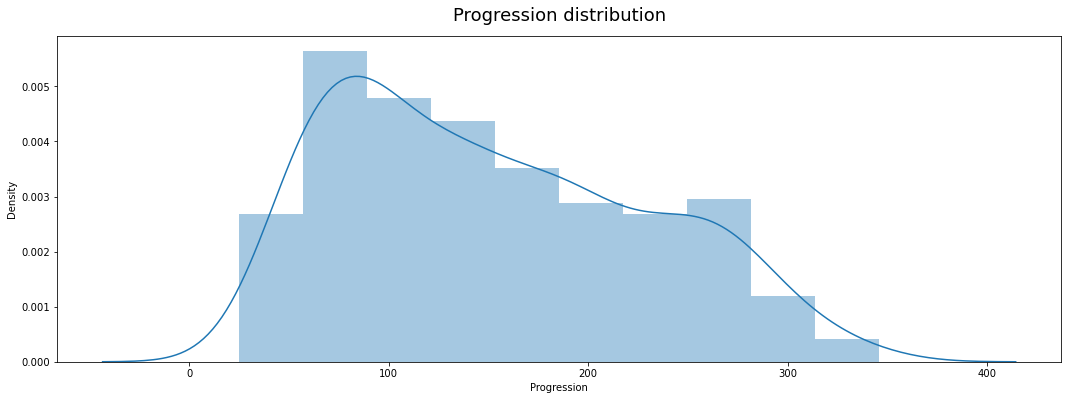

In [19]:
fig, axes = plt.subplots(figsize=(18, 6))
sns.distplot(df['Progression'], label='Progression').set_title('Progression distribution', pad=15, size =18)
plt.show()

This is a positive skew distribution with a few outliers.

Now we are going to study the correlation between all the features and the label. 

The correlation coefficient has values between -1 and 1. If the value is close to 1, it means that there exist a strong direct correlation between the two variables and if it is close to -1, it means that there exist a strong indirect correlation between the two variables.

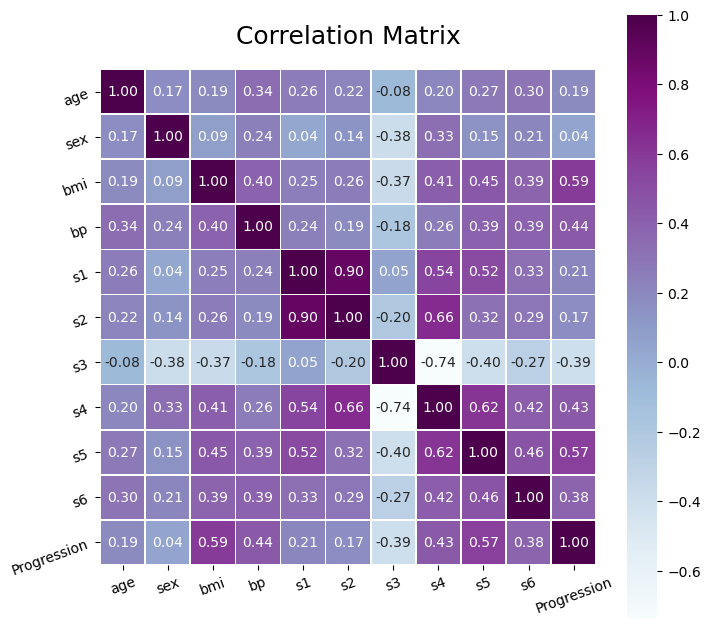

In [20]:
fig = plt.figure(figsize=(8, 8), dpi=100)

sns.heatmap(df.corr(), annot=True, square=True, cmap='BuPu', annot_kws={'size': 10}, fmt='.2f', linewidths=.5)   

plt.tick_params(axis='x', labelsize=10, rotation=20)
plt.tick_params(axis='y', labelsize=10, rotation=20)
plt.title('Correlation Matrix', size=18, pad=18)

plt.show()

From the correlation matrix we can see that the features that are the most correlated to our label are bmi and s5.

A good practice in data exploration is to check for multi-co-linearity. Note that for example the features s1 and s2 have a correlation of 0.90 and therefore we should not select both these features together for training our models.

Let us study a bit more in depth the relationship bewteen BMI, s5 and Progression using a pair-plot.

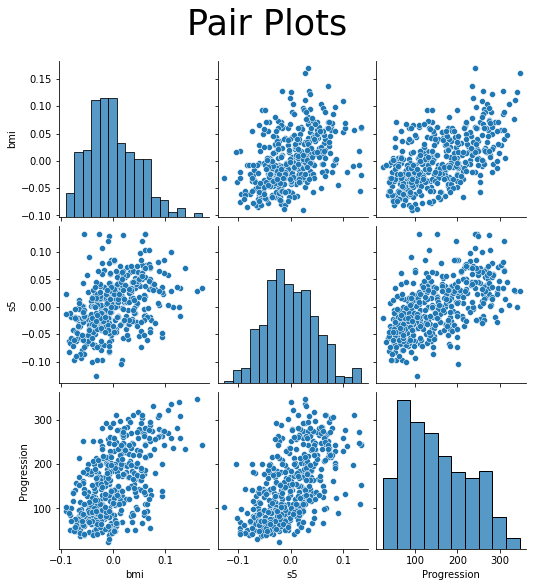

In [21]:
g = sns.pairplot(df, vars = ['bmi', 's5', 'Progression'])
g.fig.suptitle('Pair Plots', fontsize=35, y=1.08)

plt.show()

We can see that both bmi and s5 increase when progression increases with the exception of a few outlier and that both bmi and s5 follow a normal distribution.

### Data preparation for training and testing

X are going to be our features of interest and Y is going to be our label.

In [22]:
X = pd.DataFrame(np.c_[df['bmi'], df['s5']], columns = ['bmi','s5']) 
#The command np.c_ from the numpy library allow us to concatenate the columns bmi and s5.
Y = df['Progression']

Next, we split the data into our training and testing sets. The models will be trained with 70% of the samples and tested with the remaining 30%. We use train_test_split function provided by the scikit-learn library to split the data.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=23)

We check the size of our training and testing sets.

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(309, 2)
(133, 2)
(309,)
(133,)


## Linear Regression

We first train our training data using scikit-learn’s LinearRegression.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

We will evaluate the performace of our model using the RMSE and R2-score.

In [26]:
from sklearn.metrics import r2_score
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 55.0965870231217
R2 score is 0.46445186628523727


Here we plot the actual values of the label in the test data versus the predicted values.

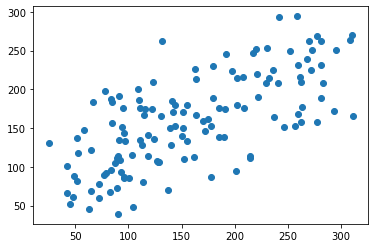

In [27]:
plt.scatter(Y_test, y_test_predict)
plt.show()

If the values were predicted perfectly, this would be a straigth line. We can make a prediction of the progression of a particular value of bmi and s5.

In [28]:
lin_model.predict([[0.05, 0.01]])

array([193.86699926])

## Polynomial Regression

Let's try now different polynolial regression algorithms - these are regression algorithms that make predictions using a n-th degree polynomial. 

Polynomial Regression is sensitive to outliers - the presence of outliers can badly affect the performance of the model.

We import PolynomialFeatures from sklearn.preprocessing.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

We first use a polynomial of degree 2 and follow the same steps we took when perfoming linear regression.

In [30]:
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=23)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(309, 6)
(133, 6)
(309,)
(133,)


In [32]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [33]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 56.120303639171894
R2 score is 0.4443655814262729


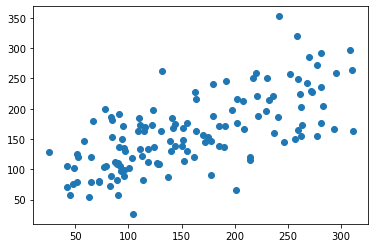

In [34]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [35]:
lin_model.predict(polynomial_features.fit_transform([[0.05,0.01]]))

array([194.28925297])

Let's see what happens if we use polinomials of higher order.

2
The model performance for testing set
--------------------------------------
RMSE is 56.120303639171894
R2 score is 0.4443655814262729


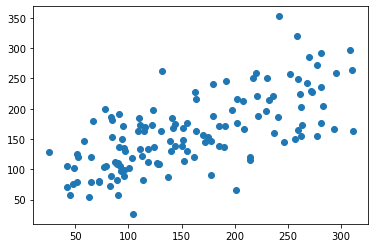

3
The model performance for testing set
--------------------------------------
RMSE is 56.2723011690599
R2 score is 0.4413517192880132


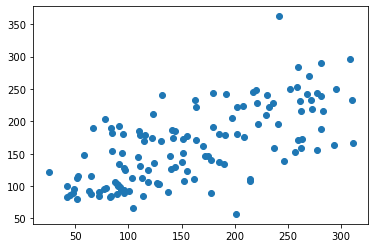

4
The model performance for testing set
--------------------------------------
RMSE is 56.70814640130553
R2 score is 0.4326644215491988


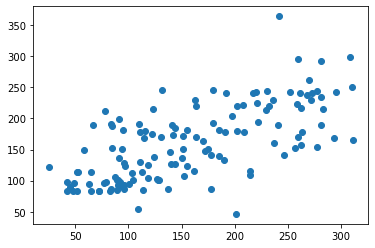

5
The model performance for testing set
--------------------------------------
RMSE is 59.62921329292705
R2 score is 0.37271157317698167


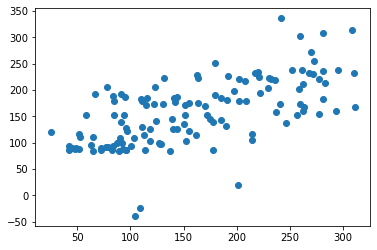

6
The model performance for testing set
--------------------------------------
RMSE is 287.61120111622705
R2 score is -13.593541835820698


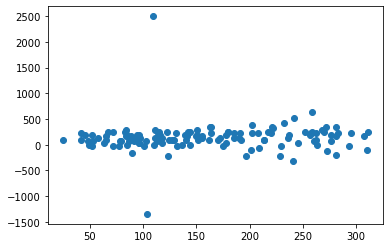

7
The model performance for testing set
--------------------------------------
RMSE is 232.1554282310514
R2 score is -8.508385944163985


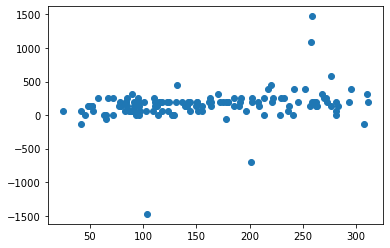

8
The model performance for testing set
--------------------------------------
RMSE is 650.4947509800763
R2 score is -73.65118548031833


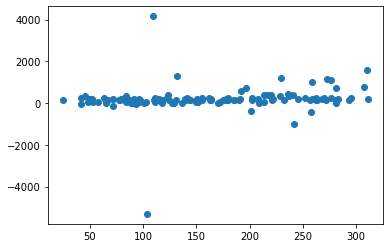

9
The model performance for testing set
--------------------------------------
RMSE is 2629.6734852634736
R2 score is -1218.980167805453


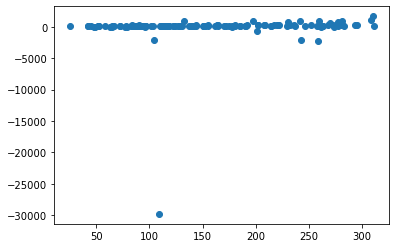

In [36]:
for i in range(2,10):
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly = polynomial_features.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=23)
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
    
    print(i)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

    plt.scatter(Y_test, y_test_predict)
    plt.show()

## Lasso Regression

We will now explore Lasso Regression. This type of regression is well-suited for models that present high multicollinearity.

In [37]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, normalize=True)

In [38]:
y_test_predict = lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 55.26117024011756
R2 score is 0.46124753412355346


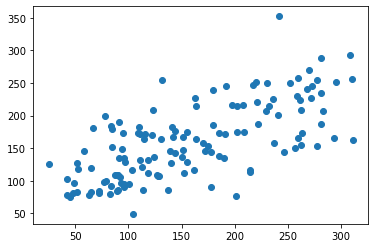

In [39]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [40]:
lasso.predict(polynomial_features.fit_transform([[0.05, 0.01]]))

array([192.0995493])

## Ridge Regression

Ridge Regression avoids over-fitting by penalising models with too large coefficients. Both Lasso and Ridge regression have built in regularization - this allows you to handle complex models at the same time that you are preventing over-fitting.

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001, normalize=True)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.001, normalize=True)

In [54]:
y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 74.63299141954967
R2 score is 0.01732294782164545


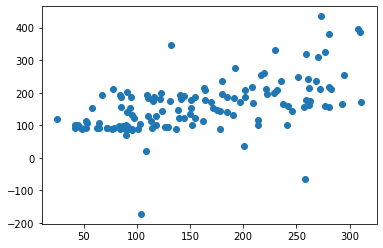

In [55]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [56]:
ridge.predict(polynomial_features.fit_transform([[0.05, 0.01]]))

array([202.88314013])

Now we use Support Vector Machine algorithm. It's default kernel is rbf.

## Support Vector Machine (Regression)

Regression support vector machine algorithms are usually used when the number of features is high in comparison to the number of data points in the dataset.

It is impotant to use the correct kernel and to set an optimum set of parameters in order to achieve accurate results.

In [57]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=1))
regr.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, epsilon=1))])

The model performance for testing set
--------------------------------------
RMSE is 73.43025862472044
R2 score is 0.04874000822138891


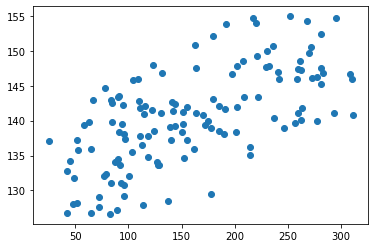

In [58]:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
plt.scatter(Y_test, y_test_predict)
plt.show()

We try now a linear kernel.

In [59]:
regr = make_pipeline(StandardScaler(), SVR(C=0.6, epsilon=1, kernel = 'linear'))
regr.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.6, epsilon=1, kernel='linear'))])

The model performance for testing set
--------------------------------------
RMSE is 57.796075016363645
R2 score is 0.41068728969340684


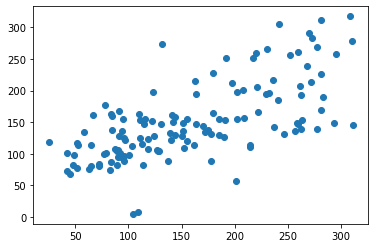

In [60]:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.scatter(Y_test, y_test_predict)
plt.show()

We try now a polynomial kernel.

In [61]:
regr = make_pipeline(StandardScaler(), SVR(C=2, epsilon=2, kernel = 'poly'))
regr.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=2, epsilon=2, kernel='poly'))])

In [62]:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 199.21006572832724
R2 score is -6.001186930811543


We try now a sigmoid kernel.

In [63]:
regr = make_pipeline(StandardScaler(), SVR(C=0.3, epsilon=0.3, kernel = 'sigmoid'))
regr.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.3, epsilon=0.3, kernel='sigmoid'))])

In [64]:
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 75.44387474349523
R2 score is -0.004146517922421156


The algorithm that gives us the lowest RMSE and highest R2 is **Linear Regression**.

## STRETCH

Could you tune the hyperparameters on the other models to achieve better accuracy of the models? What about selecting more features with high correlation? Would cross-validation improve the accurracy of the models?